<a href="https://colab.research.google.com/github/smiledinisa/sk_learn/blob/master/sk_learn002_breast_canser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 乳腺癌数据，随机森林调参

from google.colab import drive


In [4]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [5]:
# 导入库

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import sklearn
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np


In [6]:
# daoru 数据

data = load_breast_cancer()
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [10]:
data.data.shape # 可以看出，总共有569个数据，每个数据30个特征。

(569, 30)

In [11]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [14]:
data.target_names  # 分类就两个，恶性的，初期的。

array(['malignant', 'benign'], dtype='<U9')

In [15]:
# 进行一次简单的建模。
rfc = RandomForestClassifier(n_estimators=100, random_state=90)
score_pre = cross_val_score(rfc,data.data, data.target, cv=10).mean()
score_pre

0.9648809523809524

0.9631265664160402 71


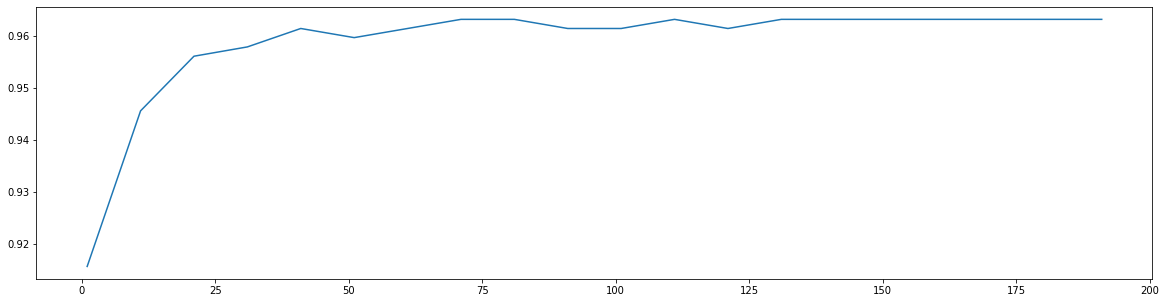

In [16]:
# 什么都没有调节，就到了96以上的准去率。
# 现实的数据是不可能有这么好的效果的。

# 调参示例： 

# 第一步： 肯定调节n_estimators

# 为什么不直接用网格搜索？先用曲线进行大致范围的估计，然后再用网格搜索，这样会事半功倍。

scorel = []

for i in range(0,200,10):
  rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1, random_state=90)
  score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
  scorel.append(score)

# 绘制图像。

print(max(scorel), (scorel.index(max(scorel))*10) + 1) #找出最大的score,以及相应的索引。
plt.figure(figsize=(20,5))
plt.plot(range(1,201,10), scorel)
plt.show()



0.9666353383458647 73


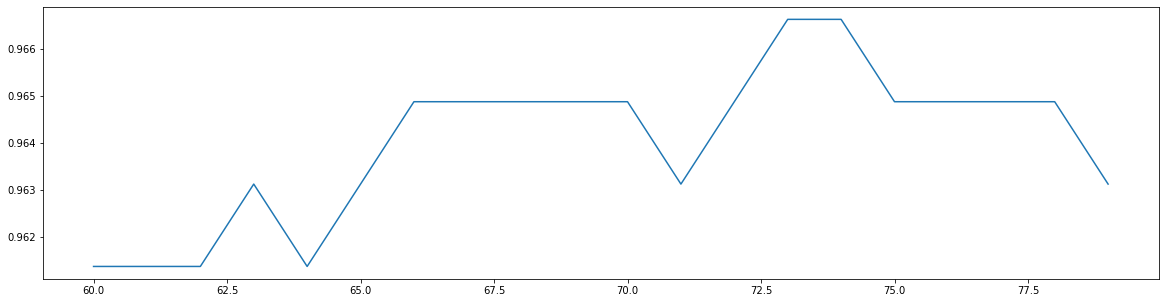

In [17]:
# 在确定好的范围内，进一步细化曲线。

scorel = []

for i in range(60,80):
  rfc = RandomForestClassifier(n_estimators=i, n_jobs=-1, random_state=90)
  score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
  scorel.append(score)
print(max(scorel), ([*range(60,80)][scorel.index(max(scorel))])) #找出最大的score,以及相应的索引。
plt.figure(figsize=(20,5))
plt.plot(range(60,80), scorel)
plt.show()

In [18]:
# 然后，我们开始进行网格搜索。

# 注意，有些曲线是没有参照的，很难说清一个范围，这种情况下我们使用学习曲线，看趋势从曲线的结果确定范围，然后细化。

# param_grid = {'n_estimators':np.arange(0, 200, 10)}
# param_grid = {'max_depth':np.arange(1, 20, 1)}
#  
# param_grid = {'max_leaf_nodes':np.arange(25,50,1)}
# 对于大型数据集，可以尝试从1000来构建，先输入1000，每100个叶子一个区间，再逐渐缩小范围


# 有一些参数是可以找到一个范围的，或者说我们知道他们的取值和随着他们的取值，模型的整体准确率会如何变化，这
# 样的参数我们就可以直接跑网格搜索
# param_grid = {'criterion':['gini', 'entropy']}
# param_grid = {'min_samples_split':np.arange(2, 2+20, 1)}
# param_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}
# param_grid = {'max_features':np.arange(5,30,1)}  # 我们本来的特征就是30




In [19]:
# 开始按照参数对模型进行准确率的影响程度进行调参。
# max_depth:


param_grid = {'max_depth': np.arange(1,20,1)} # 根据数据集的大小来进行。

rfc = RandomForestClassifier(n_estimators=73, random_state=90)
GS = GridSearchCV(rfc, param_grid=param_grid, cv=10)
GS.fit(data.data, data.target)
print(GS.best_params_)
print(GS.best_score_)


{'max_depth': 8}
0.9666353383458647


In [20]:
# 从结果可以看出，准确率已经没有再提高了。

# 调整max_features

param_grid = {'max_features':np.arange(5,30,1),'min_samples_leaf': np.arange(1,10+1, 1),'min_samples_split': np.arange(2,20+2,1),'min_samples_split': np.arange(2,20+2,1)}

"""
max_features是唯一一个即能够将模型往左（低方差高偏差）推，也能够将模型往右（高方差低偏差）推的参数。我
们需要根据调参前，模型所在的位置（在泛化误差最低点的左边还是右边）来决定我们要将max_features往哪边调。
现在模型位于图像左侧，我们需要的是更高的复杂度，因此我们应该把max_features往更大的方向调整，可用的特征
越多，模型才会越复杂。max_features的默认最小值是sqrt(n_features)，因此我们使用这个值作为调参范围的
最小值。
"""

rfc = RandomForestClassifier(n_estimators=73, random_state=90)

GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)
print(GS.best_params_)
print(GS.best_score_)

{'max_features': 24}
0.9666666666666668


In [21]:
# 我们注意到，上边两个参数，第一个参数将模型向左推，是模型复杂度降低，而max——feature将模型向右推，使模型的复杂度升高。
## 泛化能力都有了提升。
# 到这一步其实已经差不多了。

# 但是我们不妨再继续试试其他参数



In [22]:
# min_samples_leaf

param_grid = {'min_samples_leaf': np.arange(1,10+1, 1)}
#对于min_samples_split和min_samples_leaf,一般是从他们的最小值开始向上增加10或20
#面对高维度高样本量数据，如果不放心，也可以直接+50，对于大型数据，可能需要200~300的范围
#如果调整的时候发现准确率无论如何都上不来，那可以放心大胆调一个很大的数据，大力限制模型的复杂度



rfc = RandomForestClassifier(n_estimators=73, random_state=90, max_features=24, max_depth=8)
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

print(GS.best_params_)
print(GS.best_score_)

{'min_samples_leaf': 1}
0.9666353383458647


In [23]:
# 尝试调整min_sampes_split

param_grid = {'min_samples_split': np.arange(2,20+2,1)}

rfc = RandomForestClassifier(n_estimators=73,random_state=90, max_features=24, max_depth=8, min_samples_leaf=1)
GS = GridSearchCV(rfc, param_grid, cv =10)
GS.fit(data.data, data.target)

print(GS.best_params_)
print(GS.best_score_)

{'min_samples_split': 6}
0.9701754385964912


In [27]:
# 尝试调整min_sampes_split

# 问题，我们只是再一个参数基础上调参呢？？？ 

param_grid = {'min_samples_split': np.arange(2,20+2,1)}

rfc = RandomForestClassifier(n_estimators=73,random_state=90)
GS = GridSearchCV(rfc, param_grid, cv =10)
GS.fit(data.data, data.target)

print(GS.best_params_)
print(GS.best_score_)

{'min_samples_split': 2}
0.9666353383458647


In [26]:
# criterion 参数。

param_grid = {'criterion': ['gini', 'entropy']}

rfc = RandomForestClassifier(n_estimators=73, random_state=90, max_features=24, max_depth=8, min_samples_leaf=1, min_samples_split=6)

GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

print(GS.best_params_)
print(GS.best_score_)


{'criterion': 'gini'}
0.9701754385964912


In [25]:
# 调整完毕，总结出模型的最佳参数。


rfc = RandomForestClassifier(n_estimators=73, random_state=90, max_features=24, max_depth=8, min_samples_leaf=1, min_samples_split=6)
score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
print(score)
print(score - score_pre)

0.9701754385964912
0.005294486215538852


In [1]:
# 可以从结果看到调参后，模型的准确率提升了。0.5个百分点。

# 如果我们使用多参数网格，来一次进行调参呢？？？

param_grid = {'n_estimators': np.arange(60,80,1), 
              'max_depth': np.arange(1,20,1), 
              'max_features': np.arange(5,30,1), 
              'min_samples_leaf': np.arange(1,10+1, 1), 
              'min_samples_split': np.arange(2,20+2,1)             
}

rfc = RandomForestClassifier(random_state=90)

GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

print(GS.best_params_)
print(GS.best_score_)

NameError: ignored